# 主題: iris 鳶尾花卉物種分類預測
# 學號: 168
# 姓名: 李明昌
# 日期: 2024年11月12日

# 大綱

In [1]:
# 1.商業理解
# 2.資料理解
#     2.1 模組與資料匯入
#     2.2 資料摘要
#     2.3 探索性資料分析(Exploratory Data Analysis, EDA)
#     2.4 資料視覺化
# 3.資料準備
# 4.建立模型
# 5.模型評估與測試
# 6.佈署應用與結論
# 參考文獻

# 1.商業理解

+ 研究目的: 建立一個機器學習模型, 使用監督式學習的決策樹方法, 對花卉物種建立分類模型並提供決策參考.

+ 資料來源: iris 鳶尾花卉資料集, https://en.wikipedia.org/wiki/Iris_flower_data_set

+ 資料下載: https://github.com/rwepa/DataDemo/blob/master/iris.csv

+ 檔案名稱: iris_decisiion_tree.ipynb

+ 反應變數 (Response variable), 合計1個: Species 物種

+ 獨立變數 (Independent variables), 合計4個:

  1. Sepal.Length 花萼長度
  2. Sepal.Width 花萼寬度
  3. Petal.Lenth 花瓣長度
  4. Petal.Width 花瓣寬度

+ 資料筆數 150

+ 欄位個數 5

# 2.資料理解

資料理解包括以下主題, 其中模組與資料匯入與資料摘要為必需主題:

+ 模組與資料匯入【必要項目】
+ 資料摘要【必要項目】
+ 探索性資料分析
+ 資料視覺化
+ 資料清理
+ 資料合併
+ 特徵選擇
+ 資料轉換

本研究使用 Python 程式語言(Python, 2024)並參考RWEPA網站(Lee, 2024)與Breiman(1984).

## 2.1 模組與資料匯入

In [2]:
# 載入檔案處理模組
import pandas as pd

# 載入科學計算模組
import numpy as np

# 載入決策樹模組
from sklearn.tree import DecisionTreeClassifier

# 載入區分訓練集,測試集模組
from sklearn.model_selection import train_test_split

# 載入計算分類正確率模組
from sklearn.metrics import accuracy_score

# 載入計算分類混淆矩陣模組
from sklearn.metrics import confusion_matrix

# 載入繒圖模組
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# 載入決策樹視覺化模組
from sklearn import tree

In [3]:
# 繪圖包括中文字型
import matplotlib

# 設定 matplotlib.rcParams 方法
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 設定負號正確顯示
matplotlib.rcParams['axes.unicode_minus'] = False


In [4]:
# 讀取 iris 資料集
# 資料下載: https://github.com/rwepa/DataDemo/blob/master/iris.csv

# Raw網址
urls = "https://raw.githubusercontent.com/rwepa/DataDemo/refs/heads/master/iris.csv"
df = pd.read_csv(urls)

In [5]:
# 顯示資料
df # 150*5

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div class="alert alert-block alert-info">
<b>注意: </b>資料分析的心法中提及三大技巧: 1群組 2時間 3建立評變數。
</div>

## 2.2 資料摘要

In [6]:
# 欄位名稱
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
# 資料型態
df.dtypes # 所有變數皆為 float64(實數)或 object (字串)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
# 資料摘要
# count 顯示資料沒有遺漏值 （Missing Values）
pd.set_option('display.precision', 4)
df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.0000,150.0000,150.0000,150.0000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.8433,3.0573,3.7580,1.1993,NaN
std,0.8281,0.4359,1.7653,0.7622,NaN
min,4.3000,2.0000,1.0000,0.1000,NaN
25%,5.1000,2.8000,1.6000,0.3000,NaN
50%,5.8000,3.0000,4.3500,1.3000,NaN
75%,6.4000,3.3000,5.1000,1.8000,NaN


## 2.3 探索性資料分析(Exploratory Data Analysis, EDA)

In [9]:
# 資料列數與行數
df.shape

(150, 5)

In [10]:
# 檢查 NA 值
df.isnull().sum() # 所有變數皆沒有NA值

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [11]:
# 顯示前5筆
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# 顯示後5筆
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 2.4 資料視覺化

**相關係數矩陣(correlation coefficient matrix)**

In [13]:
# 計算相關係數
# correlation = df.corr() # ValueError, 其中 Species 是字串型態, 無法計算相關係數.
correlation = df.iloc[:,0:4].corr()
correlation

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000,-0.1176,0.8718,0.8179
Sepal.Width,-0.1176,1.0000,-0.4284,-0.3661
Petal.Length,0.8718,-0.4284,1.0000,0.9629
Petal.Width,0.8179,-0.3661,0.9629,1.0000


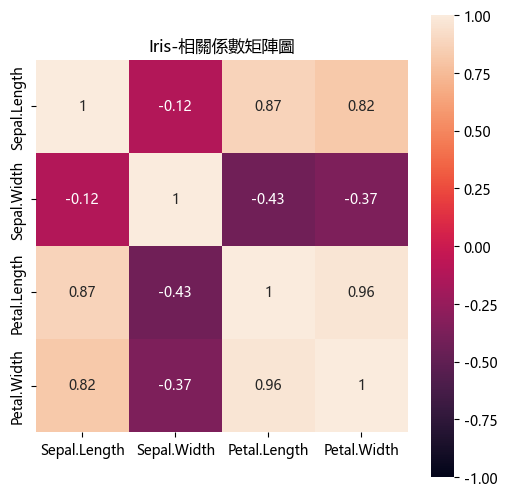

In [14]:
plt.figure(figsize=(6, 6)) # 設定繒圖大小
plt.title('Iris-相關係數矩陣圖') # 建立標題
sns.color_palette("Spectral", as_cmap=True) # 設定顏色調色盤
sns.heatmap(correlation, vmax=1, vmin=-1, square=True,annot=True) # 繪製相關係數矩陣圖
plt.show() # 顯示繪圖結果

上方相關係數圖顯示以下之特質:

+ 說明相關係數之整體結果.
+ 結果顯示 Petal.Length 與 Petal.Width 為正相關達最高值 0.96.
+ 結果顯示 Sepal.Length 與 Petal.Length 為正相關 0.87.
+ 結果顯示 Sepal.Length 與 Sepal.Width 為負相關 -0.12.
+ 結果顯示 Sepal.Width 與 Petal.Length 為負相關達最小值 -0.43.

**散佈圖矩陣(scatter plot matrix)-使用 seaborn**

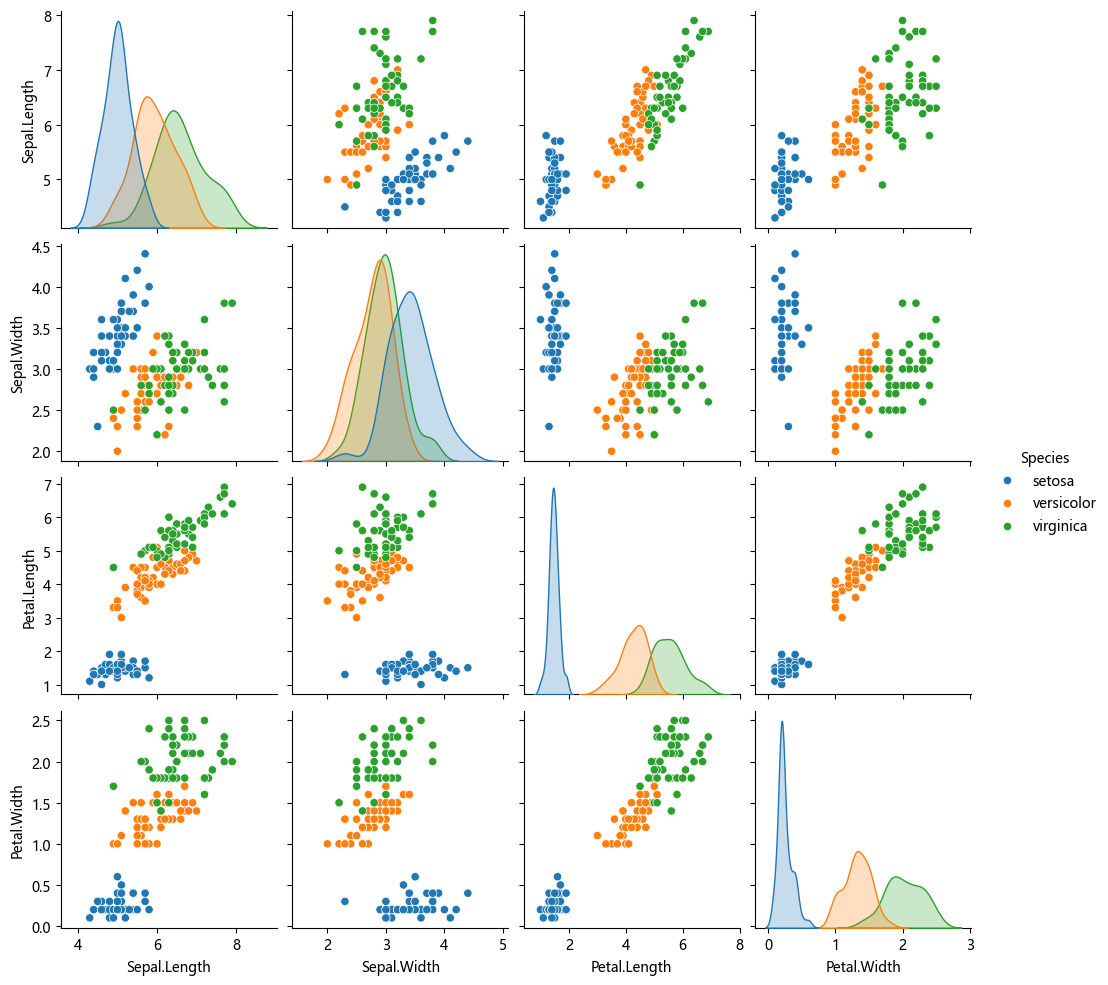

In [15]:
sns.pairplot(df,hue='Species')

上方散佈圖矩陣顯示以下之特質:

+ 對角線位置說明各變數的直方圖, 其中只有 Sepal.Width 約略呈現常態分配.
+ 結果顯示 Petal.Length 與 Petal.Width 具有線性相關.

**散佈圖矩陣(scatter plot matrix)-使用 pandas**

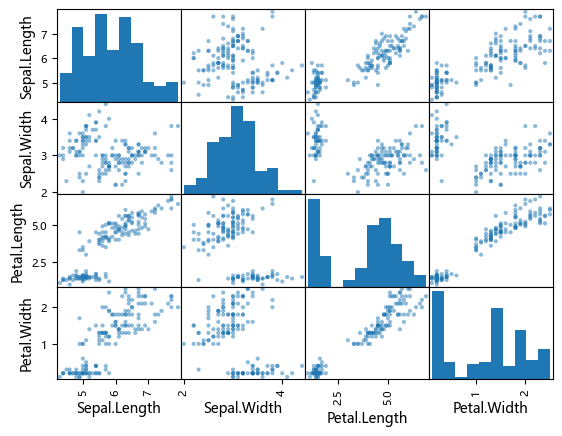

In [16]:
scatter_matrix(df.iloc[:,0:4])
plt.show()
# 散佈圖矩陣之說明參考使用 seaborn 之結果.

# 3.資料準備

+ 資料準備主要工作是將資料隨機區分為二大類：訓練集（train dataset）與測試集（test dataset）為主。

In [17]:
# 篩選 自變數
X = df.loc[:,'Sepal.Length':'Petal.Width']
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# 篩選 反應變數 
Y = df["Species"]
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [19]:
# 區分自變數訓練集80%, 測試集20%, 設定亂數種子為168, 使得每次執行區分結果皆相同.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [20]:
# 自變數-訓練集
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [21]:
# 資料列數, 行數 (120,4)
X_train.shape

(120, 4)

In [22]:
# 自變數-測試集
X_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [23]:
# 資料列數, 行數 (30,4)
X_test.shape

(30, 4)

In [24]:
# 反應變數-訓練集
Y_train.head()

91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
Name: Species, dtype: object

In [25]:
# 反應變數-測試集
Y_test.head()

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: Species, dtype: object

# 4.建立模型

建立模型方法包括推論統計, 機器學習, 深度學習與生成式學習等方法. 本研究是屬於類別型之分類預測問題, 使用監督式學習的決策樹方式進行建立預測模型.

參考: https://scikit-learn.org/1.5/modules/tree.html

決策樹常用的演算法包括 ID3, C4.5, C5.0 and CART (Classification and Regression Tree). Scikit-learn 主要使用 **CART** 方法.

+ ID3 (Iterative Dichotomiser 3, 迭代二分法 3):
  - 1986 年由Ross Quinlan開發。
  - ID3 的特徵變數值(即輸入變數)必須是類別型變數, 反應變數為類別型變數.
  - 演算法為每個節點採用貪婪的方式找到將為分類目標產生最大資訊增益 (information gain) 的分類特徵, 即找出哪一個變數做為判斷屬性.
  - 決策樹生長到最大深度, 然後通常會使用修剪步驟來提高樹的一般化特性以避免過度擬合 (Overfitting).

+ C4.5
  - C4.5 是 ID3 的第二代產品.
  - C4.5 透過動態定義離散屬性（基於數值變數）將連續屬性值劃區分為一組離散區間，從而消除了特徵必須是可分類的限制.
  - C4.5 將經過訓練的樹（即 ID3 演算法的輸出）轉換為 if-then 規則集.
  - 然後評估每個規則的準確性以確定它們的應用順序. 如果規則的準確性在沒有前提條件的情況下提高, 則透過刪除規則的前提條件來完成修剪.

+ C5.0
  - C5.0 是 Quinlan在專有許可下發布的最新版本.
  - C5.0 與 C4.5 相比，它使用更少的記憶體並建立更小的規則集, 同時更準確分類結果.

+ CART
  - Breiman等人於1984年發表 CART.
  - CART (Classification and Regression Tree, 分類和迴歸樹) 與 C4.5非常相似, 但不同之處在於它支援數值目標變數（迴歸）並且不計算規則集.
  - 使用使用貪婪的方法在每個節點產生最大資訊增益的特徵和閾值來建立二元樹 (binary trees).
  - 評估所有可能的分割並選擇最能減少結果子集的雜質的分割。
  - 對於分類問題 CART 使用吉尼不純度指標 (Gini impurity index)作為分割標準. 吉尼雜質越低，子集越純淨結果愈佳.
  - 對於迴歸問題 CART 使用殘差縮減 (Residual reduction) 作為分割標準. 殘差減少至愈低, 模型與資料的擬合愈好結果愈佳.立二元樹。

In [26]:
# 建立決策樹物件
decision_tree_clf = DecisionTreeClassifier(criterion='entropy')

In [27]:
# 建立決策樹模型
decision_tree_clf = decision_tree_clf.fit(X_train, Y_train)

In [28]:
# regression_clf 物件可使用之屬性或方法
dir(decision_tree_clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_missing_values_in_feature_mask',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_support_missing_values',
 '_validate_X_predict',
 '_validate

In [29]:
# 取得特徵的重要性, 結果顯示 x[3] (Petal.Width) 為最重要變數.
print(decision_tree_clf.feature_importances_)

[0.00848378 0.01710372 0.09849491 0.87591759]


In [30]:
feat_importances = pd.DataFrame(decision_tree_clf.feature_importances_, index=df.columns[0:4], columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feat_importances)

              Importance
Petal.Width       0.8759
Petal.Length      0.0985
Sepal.Width       0.0171
Sepal.Length      0.0085


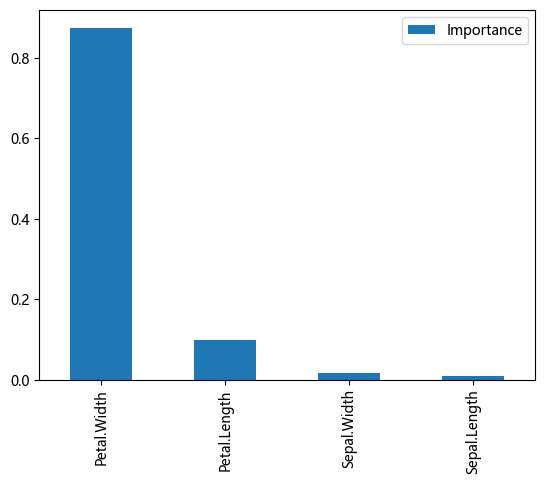

In [31]:
# 特徵重要性視覺化-長條圖
feat_importances.plot(kind='bar')
plt.show()

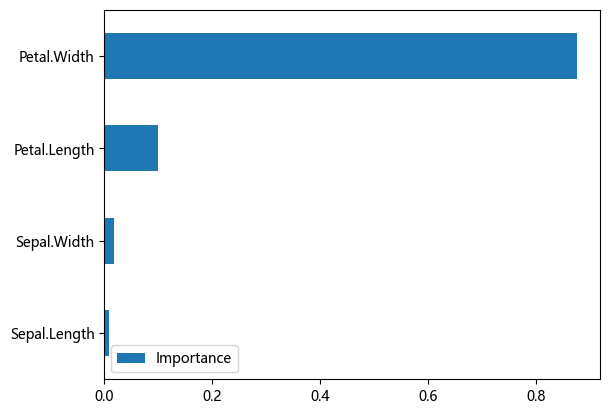

In [32]:
# 特徵重要性視覺化-水平長條圖
feat_importances.sort_values(by='Importance').plot.barh(y='Importance')
plt.show()

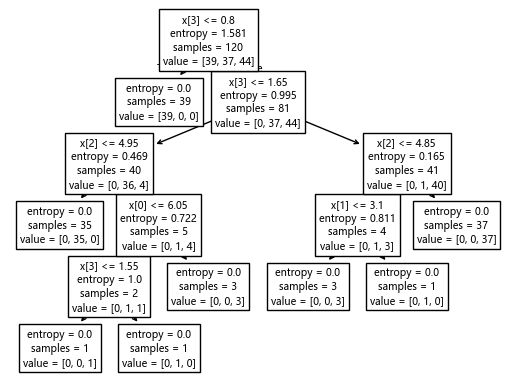

In [33]:
# 訓練集模型-繪圖結果
# 決策樹模型中, 特徵可以重複使用.
tree.plot_tree(decision_tree_clf)
plt.show()

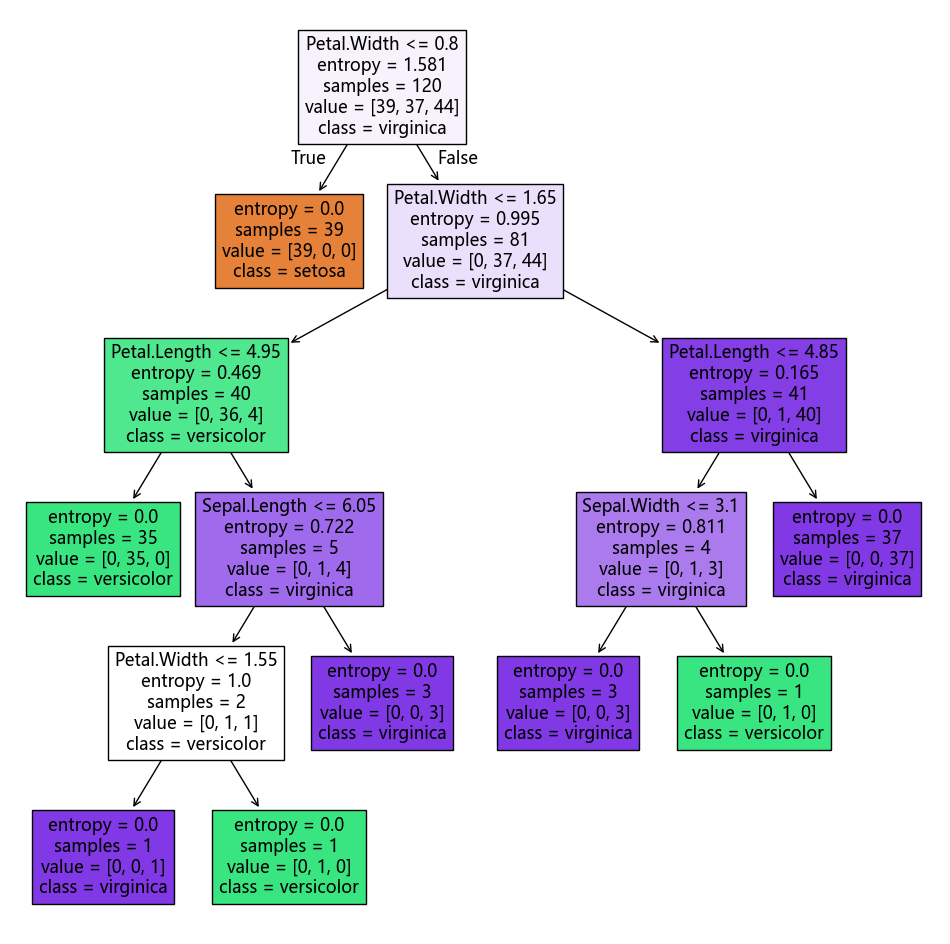

In [34]:
# 優化決策樹視覺化
fig=plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree_clf,
               feature_names=df.columns[0:4], # 將 x[3] <= 0.8 轉換為 Pental.Width <= 0.8
               class_names=['setosa', 'versicolor', 'virginica'], # 將 class 改為目標變數顯示
               filled=True) # 將 各節點填滿顏色
plt.show()

In [35]:
# 輸出決策樹視覺化圖形
fig.savefig("tree_cart.png")

In [36]:
tree_text = tree.export_text(decision_tree_clf)
print(tree_text)

|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



In [37]:
# 將決策樹之文字模型輸出為文字檔
with open("tree_cart.txt", "w") as f:
    f.write(tree_text)

# 5.模型評估與測試

**使用測試集計算模型之正確率**

In [38]:
Y_predict = decision_tree_clf.predict(X_test)
score = accuracy_score(Y_test, Y_predict)
print("鳶尾花分類測試集的準確率：", score)

鳶尾花分類測試集的準確率： 0.9666666666666667


**建立混淆矩陣 (橫列為預測值, 直行為實際值)**

參考: https://rwepa.blogspot.com/2013/01/rocr-roc-curve.html

In [39]:
# 混淆矩陣 (Confusion matrix)
result = confusion_matrix(Y_predict, Y_test) # numpy.ndarray
print(result)

[[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


In [40]:
# 使用混淆矩陣計算鳶尾花分類測試集的準確率, 結果與 accuracy_score 相同.
result.diagonal().sum()/result.sum()

0.9666666666666667

**使用測試集計算模型之混淆矩陣(Confusion matrix)**

# 6.佈署應用與結論

**6.1 結論**

1. 本研究已經完成使用監督式學習建立 iris 分類預測模型以做為決策參考。

2. 研究變數包括 Sepal.Length 等13個變數。

3. 本研究已經建立 CART 決策樹模型。

4. 結果顯示迴歸模型的判定係數接近80%的解釋能力。

**6.2 未來研究**

未來研究主題可加入以下二個相關演算法:

1. 機器學習 (Machine Learning): https://en.wikipedia.org/wiki/Machine_learning

2. 深度學習應用 (Deep Learning): https://en.wikipedia.org/wiki/Deep_learning

# 參考文獻

1. Ming-Chang, Lee. (2024). RWEPA網站. https://rwepa.blogspot.com. Last accessed on October 10, 2024.
2. Python 3.13.0 Reference Documentation. (2024). https://docs.python.org/3/. Last accessed on October 10, 2024.
3. Breiman, Leo., Friedman, J. H., Olshen, R. A., Stone, C. J. (1984). Classification and regression trees. Monterey, CA: Wadsworth & Brooks/Cole Advanced Books & Software. URL: https://www.amazon.com/Classification-Regression-Trees-Leo-Breiman/dp/1138469521.

In [41]:
# end